In [9]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [12]:
data = pd.read_csv("cleaned_data.csv")
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [14]:
LIMIT_BAL = data['LIMIT_BAL'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(data['LIMIT_BAL'].values.reshape(-1,1), 
                                                    data['default payment next month'].values, test_size=0.2, random_state=42)

In [15]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [16]:
model1 = lr.predict_proba(X_test)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [17]:
metrics.roc_auc_score(y_test, model1[:,1])

0.6302043467866831

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

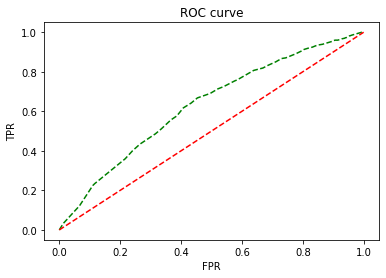

In [18]:
fpr, tpr, threshold = metrics.roc_curve(y_test, model1[:,1])
plt.plot(fpr, tpr, 'g--')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')


_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [19]:

precision, recall, threshold = metrics.precision_recall_curve(y_test, model1[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0, 1)

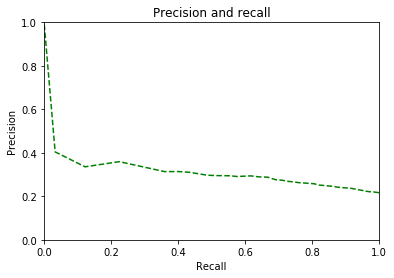

In [20]:
plt.plot(recall, precision, 'g--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall')
plt.xlim([0, 1])
plt.ylim([0, 1])


_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [21]:
metrics.auc(recall, precision)

0.31275283839480245

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [23]:
model2 = lr.predict_proba(X_train)
metrics.roc_auc_score(y_train,model2[:,1])

0.6158375447898838

    How is this different, conceptually and quantitatively, from your earlier calculation?
